In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tqdm.auto as tqdm
import pickle

In [2]:
import yfinance as yf
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
df=pd.read_csv('/kaggle/input/historical-data/Cleaned_HDFCBANK.NS_MAX_NSE.csv')

In [4]:
df.shape

(7885, 6)

In [5]:
df.tail(5)

,date,close,open,high,low,volume
7880,2026-01-04,977.50,1005.75,1006.40,976.3,27647379.0
7881,2026-01-05,962.20,962.70,966.70,956.0,31988783.0
7882,2026-01-06,949.05,956.00,956.45,946.0,52884712.0
7883,2026-01-07,946.70,944.70,953.00,941.4,21928849.0
7884,2026-01-08,939.00,945.00,950.60,933.3,38183685.0


In [6]:
df.set_index('date',inplace=True)

In [7]:
df.index = pd.to_datetime(df.index)

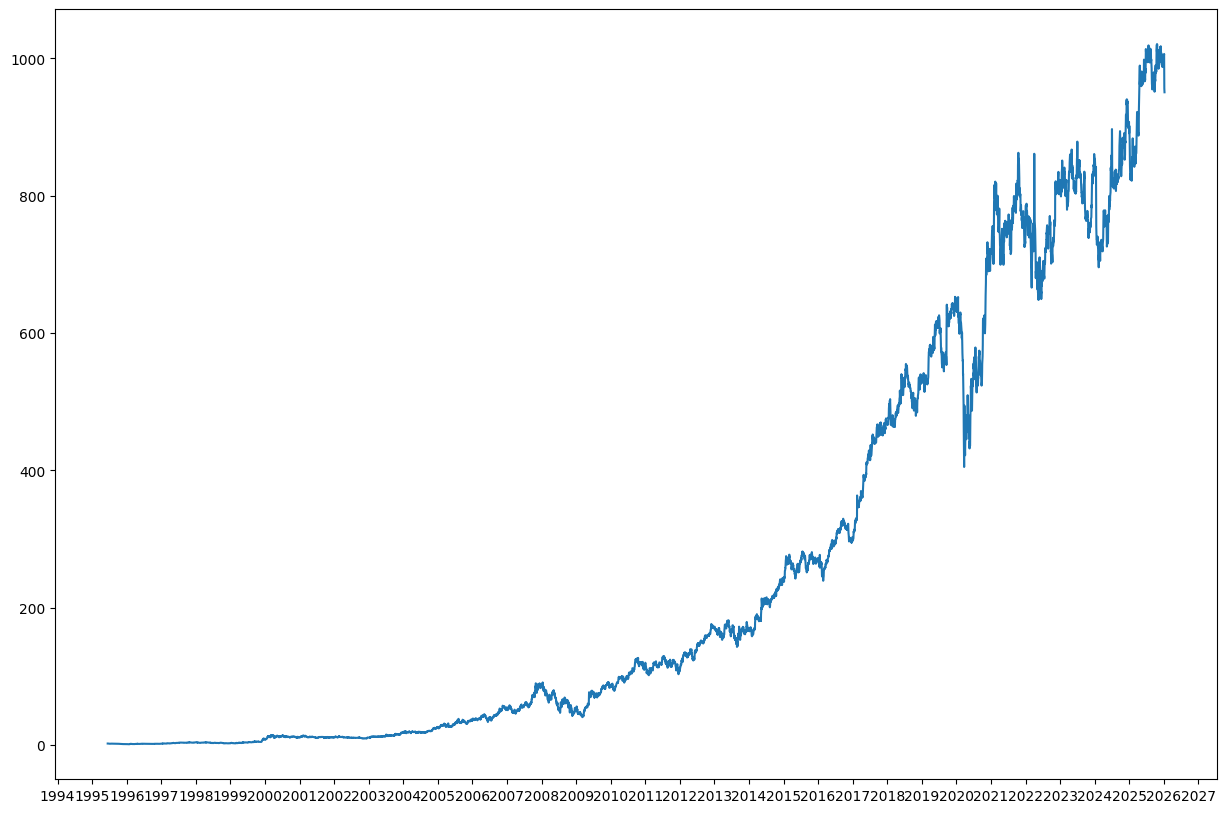

In [8]:
plt.figure(figsize=(15,10))
plt.plot(df['high'])
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.savefig('High-Curve')
plt.show()

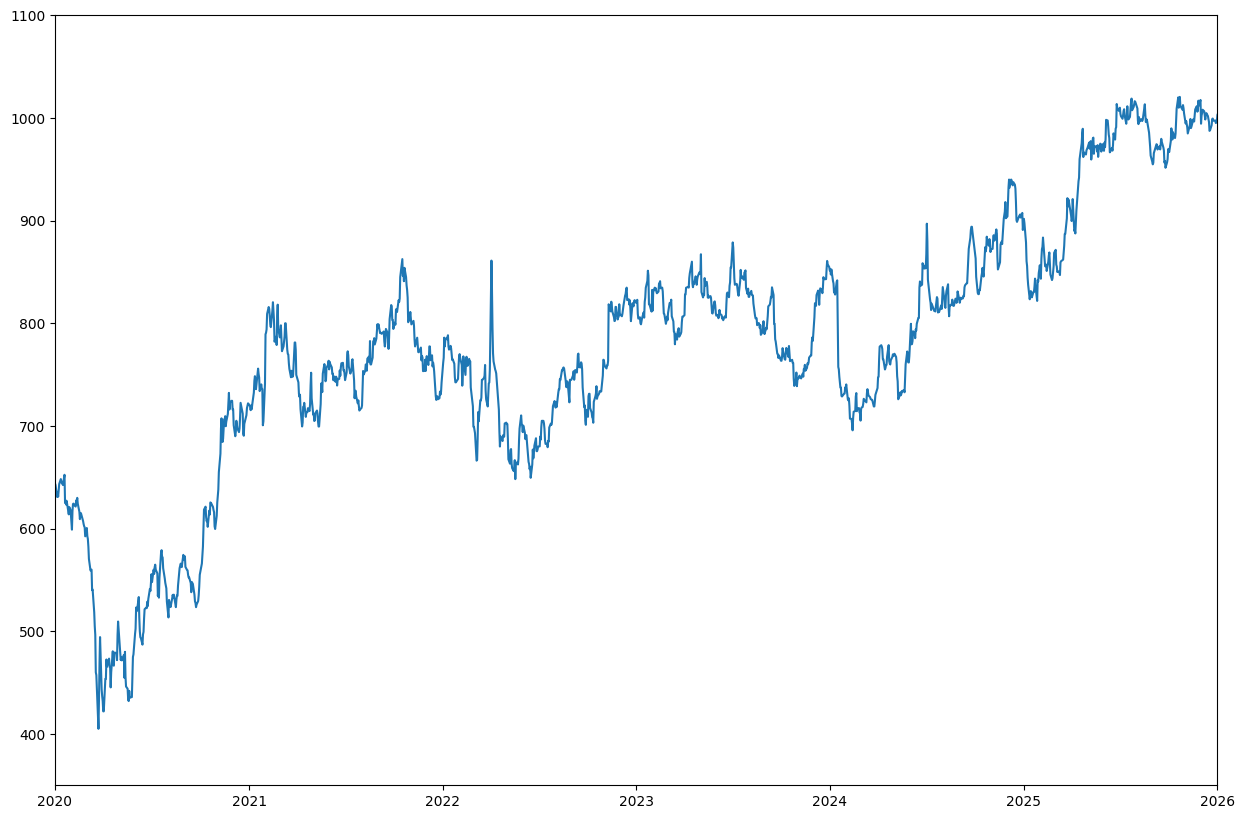

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df.index,df['high'])
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2026-01-01'))
plt.ylim(350,1100)
plt.savefig('High-Curve-Limit.png')
plt.show()

In [10]:
df.iloc[:4,:]['open']

date
1995-06-14    2.30
1995-06-15    2.28
1995-06-18    2.26
1995-06-19    2.26
Name: open, dtype: float64

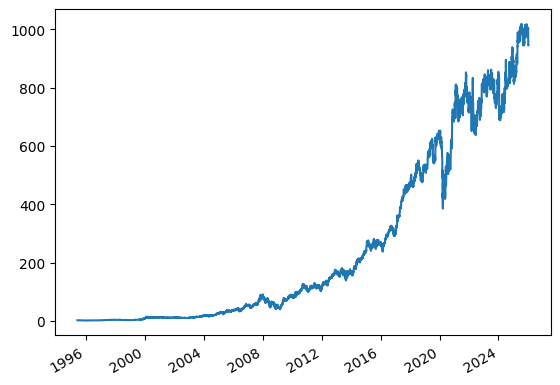

In [11]:
figure,axis=plt.subplots()
figure.autofmt_xdate()
plt.plot(df.index,df['open'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7885 entries, 1995-06-14 to 2026-01-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   7885 non-null   float64
 1   open    7885 non-null   float64
 2   high    7885 non-null   float64
 3   low     7885 non-null   float64
 4   volume  7885 non-null   float64
dtypes: float64(5)
memory usage: 369.6 KB


In [13]:
df.describe()

,close,open,high,low,volume
count,7885.000000,7885.000000,7885.000000,7885.000000,7.885000e+03
mean,251.679533,251.701007,254.042426,249.240923,1.218587e+07
std,298.430055,298.437180,300.863159,295.996982,1.551011e+07
min,1.220000,1.220000,1.220000,1.200000,0.000000e+00
25%,12.500000,12.500000,12.700000,12.300000,3.514320e+06
50%,104.320000,104.500000,105.750000,102.950000,8.149720e+06
75%,473.200000,472.630000,478.700000,468.670000,1.545768e+07
max,1012.900000,1018.850000,1020.500000,1008.500000,4.453421e+08


In [14]:
df['high'].rolling(7).mean().head(10)

date
1995-06-14         NaN
1995-06-15         NaN
1995-06-18         NaN
1995-06-19         NaN
1995-06-20         NaN
1995-06-21         NaN
1995-06-22    2.284286
1995-06-25    2.265714
1995-06-26    2.235714
1995-06-27    2.218571
Name: high, dtype: float64

In [15]:
df.to_csv('HDFC.csv')

In [16]:
import os
import glob
import subprocess
import shutil
from datetime import datetime
from kaggle_secrets import UserSecretsClient

GITHUB_USERNAME = "Zalanemoj"
GITHUB_REPO = "General"
GITHUB_EMAIL = "zalanemoj777@gmail.com"
GITHUB_DIR = "Outputs_Time-Series-Eda"
BRANCH = "main"

FILES_TO_PUSH = ["*.csv", "*.png", "*.jpg", "*.json","*.pkl"]
FOLDERS_TO_PUSH = ["*"]

TOKEN = UserSecretsClient().get_secret("GITHUB_TOKEN")
REPO_URL = f"https://{TOKEN}@github.com/{GITHUB_USERNAME}/{GITHUB_REPO}.git"

source = "/kaggle/working"
temp = "/kaggle/working/git_temp"

if os.path.exists(temp):
    shutil.rmtree(temp)
os.makedirs(temp)

os.chdir(temp)
subprocess.run(["git", "init"], capture_output=True)
subprocess.run(["git", "config", "user.email", GITHUB_EMAIL], capture_output=True)
subprocess.run(["git", "config", "user.name", GITHUB_USERNAME], capture_output=True)
subprocess.run(["git", "remote", "add", "origin", REPO_URL], capture_output=True)
subprocess.run(["git", "pull", "origin", BRANCH], capture_output=True)

target = os.path.join(temp, GITHUB_DIR)
os.makedirs(target, exist_ok=True)
IGNORE_FOLDERS = ["git_temp", ".virtual_documents", ".git"]
os.chdir(source)

print("Copying files:")
for pattern in FILES_TO_PUSH:
    for item in glob.glob(pattern):
        shutil.copy2(item, target)
        print(f"  ✓ {item}")

print("\nCopying folders:")
for pattern in FOLDERS_TO_PUSH:
    for folder in glob.glob(pattern):
        if any(ignored in folder for ignored in IGNORE_FOLDERS):
            continue

        if os.path.isdir(folder):
            dest = os.path.join(target, folder)
            if os.path.exists(dest):
                shutil.rmtree(dest)
            shutil.copytree(folder, dest)
            print(f"  ✓ {folder}/")

os.chdir(temp)
subprocess.run(["git", "add", "-A"], capture_output=True)
subprocess.run(["git", "commit", "-m", f"Update {datetime.now().strftime('%Y-%m-%d %H:%M')}"], capture_output=True)
subprocess.run(["git", "branch", "-M", BRANCH], capture_output=True)

result = subprocess.run(["git", "push", "-f", "origin", BRANCH], capture_output=True, text=True)

if result.returncode == 0:
    print(f"\n✅ Success! https://github.com/{GITHUB_USERNAME}/{GITHUB_REPO}/tree/{BRANCH}/{GITHUB_DIR}")
else:
    print(f"\n❌ Failed: {result.stderr}")

os.chdir(source)

Copying files:
  ✓ HDFC.csv
  ✓ High-Curve-Limit.png
  ✓ High-Curve.png

Copying folders:

✅ Success! https://github.com/Zalanemoj/General/tree/main/Outputs_Time-Series-Eda
